# ARIMA Model – NVIDIA (NVDA)

In this notebook, we implement an ARIMA model to forecast NVIDIA stock prices.
ARIMA captures trends and autocorrelation in time-series data and is compared
against the Random Walk baseline.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


In [2]:
df = pd.read_csv(
    "../data/stock_data.csv",
    index_col=0,
    parse_dates=True
)

df.head()


C:\Users\Wajiz.pk\AppData\Local\Temp\ipykernel_16044\3512037357.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


,Close,High,Low,Open,Volume,Daily_Return
Price,,,,,,
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NaN
Date,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.4748533368110657,0.4844512004950466,0.472693835359548,0.4830115137914982,197952000,-0.016890
2015-01-06,0.4604564905166626,0.4760529693490393,0.45997660458104156,0.4755730834134183,197764000,-0.030319
2015-01-07,0.4592567980289459,0.46789485997472313,0.45781711150338267,0.4638157576868942,321808000,-0.002605


In [3]:
df["Close"] = pd.to_numeric(df["Close"], errors="coerce")
df = df.dropna()

df["Close"].dtype


dtype('float64')

In [4]:
result = adfuller(df["Close"])

print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: 3.1564519848354595
p-value: 1.0


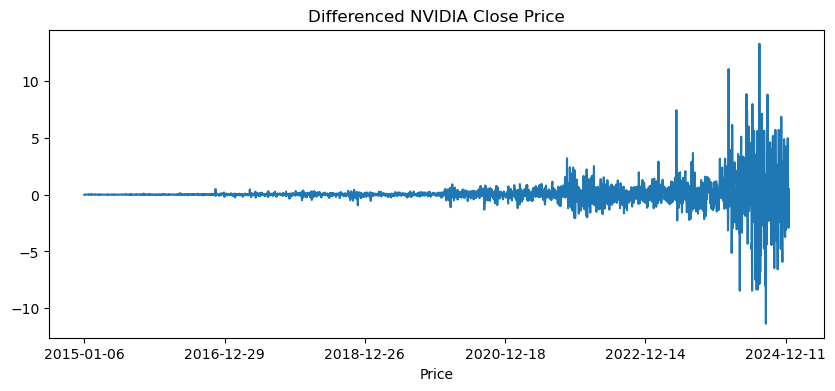

In [5]:
df["Close_diff"] = df["Close"].diff()
df["Close_diff"].dropna().plot(
    title="Differenced NVIDIA Close Price",
    figsize=(10,4)
)
plt.show()


In [6]:
train_size = int(len(df) * 0.8)
train = df["Close"][:train_size]
test = df["Close"][train_size:]


In [7]:
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2011
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -873.787
Date:                Mon, 22 Dec 2025   AIC                           1753.573
Time:                        14:47:29   BIC                           1770.391
Sample:                             0   HQIC                          1759.747
                               - 2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2318      0.181      1.279      0.201      -0.123       0.587
ma.L1         -0.2789      0.179     -1.561      0.119      -0.629       0.071
sigma2         0.1397      0.002     82.464      0.0

In [8]:
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index



C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


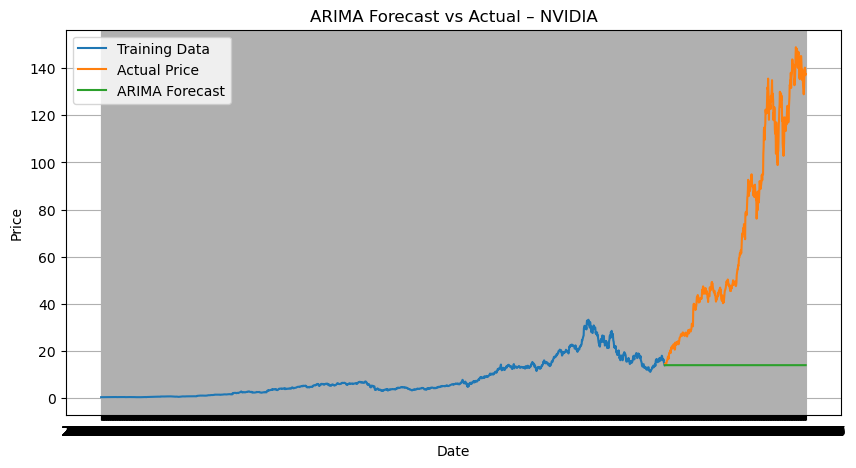

In [9]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Training Data")
plt.plot(test.index, test, label="Actual Price")
plt.plot(forecast.index, forecast, label="ARIMA Forecast")

plt.title("ARIMA Forecast vs Actual – NVIDIA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
rmse


71.02195446435631

## Interpretation

The ARIMA model captures temporal dependencies in NVIDIA stock prices and provides
more structured forecasts compared to the Random Walk model. However, due to market
volatility, prediction accuracy remains limited.
